In [9]:
#coding:utf-8

from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import (datasets, decomposition,manifold)
from pylab import mpl
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNN


mpl.rcParams['font.family'] = 'SimHei'     ### # matplotlib其实是不支持显示中文的 显示中文需要一行代码设置字体
plt.rcParams['axes.unicode_minus'] = False

(1797, 64) (1797,)


Text(0.5, 1.0, '部分样本展示')

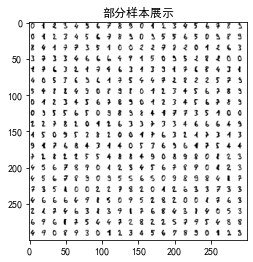

In [10]:
#加载数据，显示数据
digits = datasets.load_digits()
X = digits.data
y = digits.target
print (X.shape,y.shape)

n_row = 20
img = np.zeros((15 * n_row, 15 * n_row))
for i in range(n_row):
    ix = 15 * i + 1
    for j in range(n_row):
        iy = 15 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.title('部分样本展示')

In [11]:
#%%
# 将降维后的数据可视化,2维
def plot_embedding_2d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

In [12]:
#%%
#将降维后的数据可视化,3维
def plot_embedding_3d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i,2],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)
    plt.show()

 PCA降维
0.7273351903435469


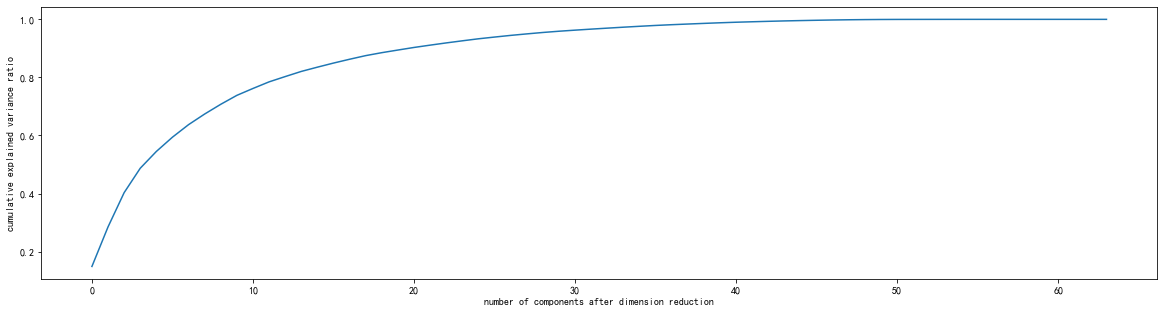

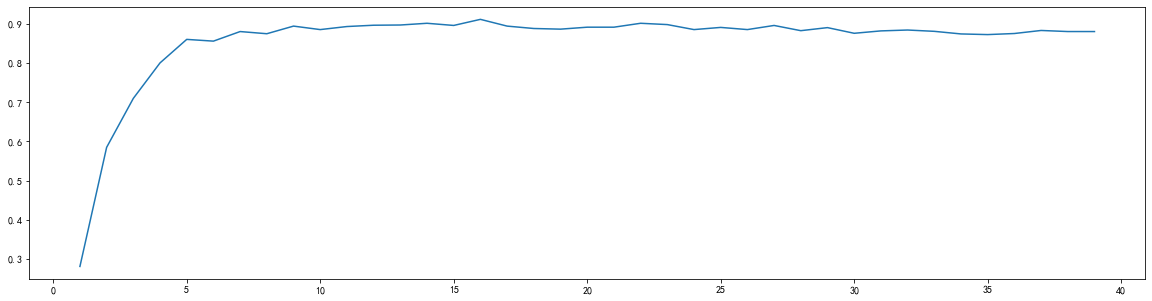

0.8714515629835965

In [13]:
# 默认的PCA
print(" PCA降维")
t0 = time()
X_pca =decomposition.PCA(n_components=3).fit_transform(X)
# plot_embedding_2d(X_pca[:,0:2],"PCA 2D")
# plot_embedding_3d(X_pca,"PCA 3D (time %.2fs)" %(time() - t0))
# plt.show()
print(cross_val_score(RFC(n_estimators=100,random_state=0),X_pca,y,cv=5).mean()) # 随机森林做交叉验证
# 累计方差贡献率曲线
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()
# 降维后维度的学习曲线,寻找最优参数
score = []
for i in range(1,40):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,40),score)
plt.show()
# 最终优化
X_res_pca = PCA(5).fit_transform(X)
cross_val_score(RFC(n_estimators=100,random_state=0),X_res_pca,y,cv=5).mean() # 随机森林做交叉验证

Isomap 降维
Done.


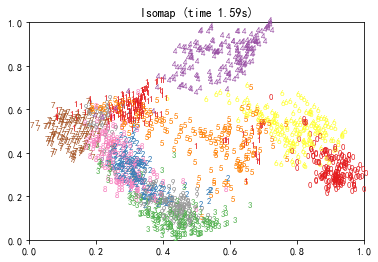

In [14]:
# #%%
#Isomap
print("Isomap 降维")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=10,n_components=2).fit_transform(X)
print("Done.")
plot_embedding_2d(X_iso,"Isomap (time %.2fs)" %(time() - t0))
plt.show()

LLE 降维


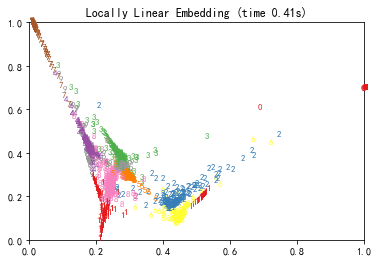

In [15]:
#standard LLE
print("LLE 降维")
clf = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2,method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
plot_embedding_2d(X_lle,"Locally Linear Embedding (time %.2fs)" %(time() - t0))
plt.show()

 t-SNE 降维
(1797, 3)


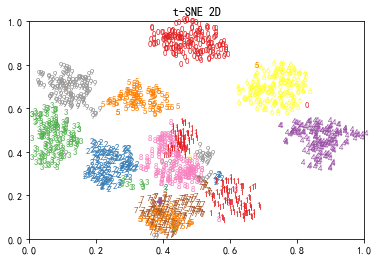

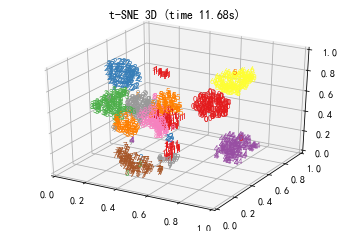

In [16]:
# t-SNE
print(" t-SNE 降维")
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
print (X_tsne.shape)
plot_embedding_2d(X_tsne[:,0:2],"t-SNE 2D")
plot_embedding_3d(X_tsne,"t-SNE 3D (time %.2fs)" %(time() - t0))
plt.show()

In [17]:
print(cross_val_score(KNN(),X_pca,y,cv=5).mean())


print(cross_val_score(KNN(),X_iso,y,cv=5).mean())


print(cross_val_score(KNN(),X_lle,y,cv=5).mean())

print(cross_val_score(KNN(),X_tsne,y,cv=5).mean())

0.7273413803775921
0.7039291241101826
0.9026385020117612
0.9721819870009284
